In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
print("[INFO] loading CIFAR-10 dataset...")

((trainX, trainY), (testX, testY)) = cifar10.load_data()

trainX = trainX.astype('float') / 255.0
testX = testX.astype('float') / 255.0

trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

[INFO] loading CIFAR-10 dataset...
170508288/170498071 [==============================] - 2s 0us/step


In [4]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

labelnames = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
model = Sequential()

model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [10]:
opt = keras.optimizers.Adam(learning_rate=0.01)
sgd = keras.optimizers.SGD(learning_rate=0.01)
print("[INFO] training network..")
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=32)

[INFO] training network..
Epoch 1/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8569 - accuracy: 0.3331 - val_loss: 1.6958 - val_accuracy: 0.3890
Epoch 2/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6533 - accuracy: 0.4126 - val_loss: 1.6180 - val_accuracy: 0.4268
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5669 - accuracy: 0.4408 - val_loss: 1.5411 - val_accuracy: 0.4506
Epoch 4/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5013 - accuracy: 0.4669 - val_loss: 1.4769 - val_accuracy: 0.4718
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4557 - accuracy: 0.4835 - val_loss: 1.4893 - val_accuracy: 0.4605
Epoch 6/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4087 - accuracy: 0.4983 - val_loss: 1.5164 - val_accuracy: 0.4581
Epoch 7/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3721 - accuracy: 0.51

In [11]:
print("[INFO] evaluating network...")

predictions = model.predict(testX, batch_size=32)

print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names = labelnames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.59      0.69      0.64      1000
  automobile       0.68      0.67      0.68      1000
        bird       0.46      0.46      0.46      1000
         cat       0.39      0.40      0.39      1000
        deer       0.52      0.48      0.50      1000
         dog       0.47      0.48      0.47      1000
        frog       0.61      0.64      0.62      1000
       horse       0.67      0.61      0.64      1000
        ship       0.69      0.68      0.68      1000
       truck       0.61      0.58      0.60      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



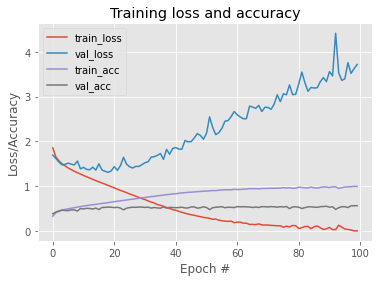

In [12]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training loss and accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('/content/drive/MyDrive/DataScience/Pyimagesearch_DeepLearningBook/Chapter10/keras_cifar10_output.png')